Setup

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import os
import sys
parent_directory = os.path.dirname(os.getcwd())
sys.path.append(parent_directory)
from model import HDRNN, trig
from trainer import Trainer
from trajectory_generator import TrajectoryGenerator
from tuning_curves import plot_average_activations
import util

In [2]:
SEQUENCE_LENGTH = 50

MODEL_PARAMS = {
    'hidden_dim': 100,
    'sequence_length': SEQUENCE_LENGTH,
    'activation': 'sigmoid',
    'loss_fun': 'MSE',
    'weight_decay': 0,
    'metabolic_cost': 0,
    'use_bias': True,
}

TRAJECTORY_PARAMS = {
    'sequence_length': SEQUENCE_LENGTH,
    'standard_deviation': .03,
    'momentum': .8,
    'step_size': 1,
    'start_pos': None,
    'modulo': True
}

LEARNING_RATE = 1e-3
NUM_EPOCHS = 10000
BATCH_SIZE = 100
PRINT_EVERY = NUM_EPOCHS // 10


In [3]:
net = HDRNN(**MODEL_PARAMS)
generator = TrajectoryGenerator(**TRAJECTORY_PARAMS)
trainer = Trainer(net, generator, LEARNING_RATE)

Train Model

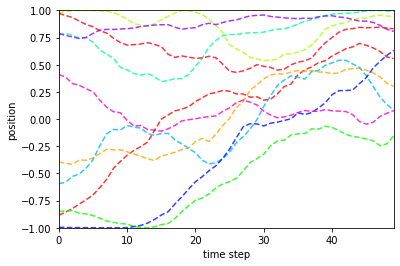

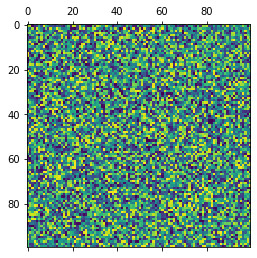

In [4]:
start, velocity, position = generator.generate_trajectory(10)
util.plot_sequence(net(velocity, start), trig(position), mode='sine')
util.visualize_recurrent(net)

Epoch 0. loss = 1.1239855289459229
Epoch 1000. loss = 0.49624693393707275
Epoch 2000. loss = 0.07195651531219482
Epoch 3000. loss = 0.00839568953961134
Epoch 4000. loss = 0.00903957337141037
Epoch 5000. loss = 0.0017770599806681275
Epoch 6000. loss = 0.0008278748719021678
Epoch 7000. loss = 0.0009434795356355608
Epoch 8000. loss = 0.0007104982505552471
Epoch 9000. loss = 0.0005820611258968711


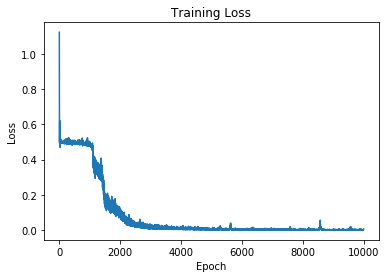

In [5]:
trainer.train(NUM_EPOCHS, BATCH_SIZE, PRINT_EVERY)
util.plot_training_loss(trainer)

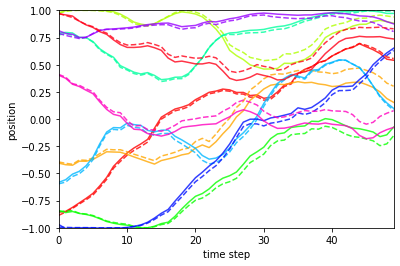

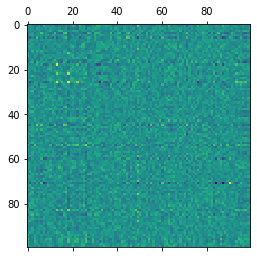

In [6]:
util.plot_sequence(net(velocity, start), trig(position), mode='sine')
util.visualize_recurrent(net)

Visualize Tuning Curves

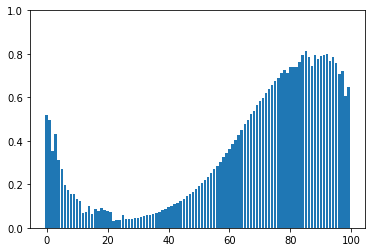

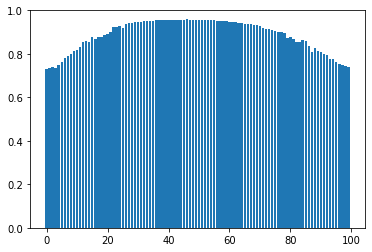

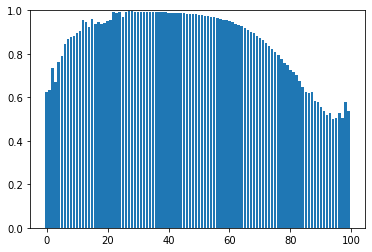

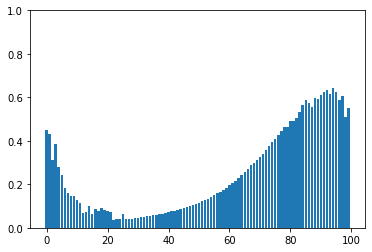

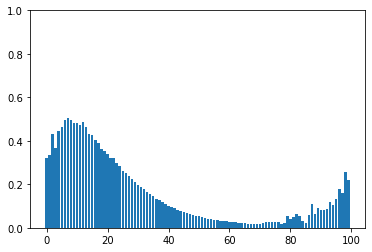

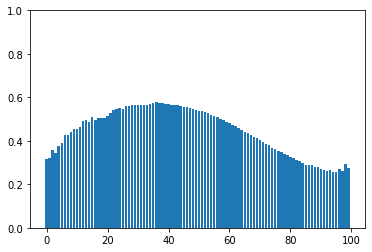

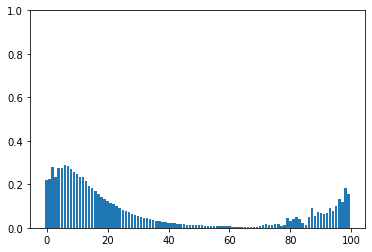

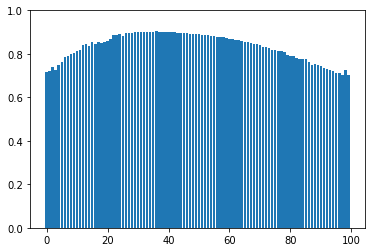

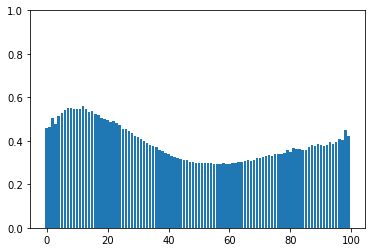

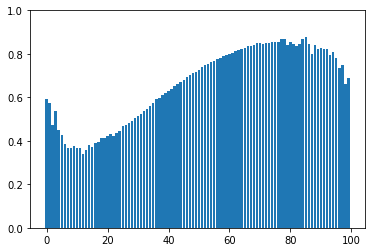

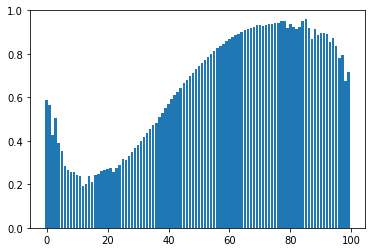

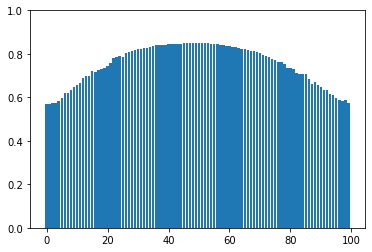

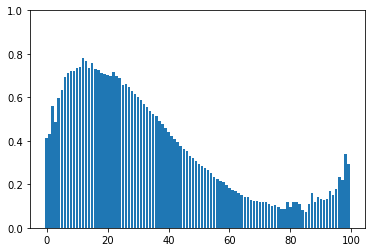

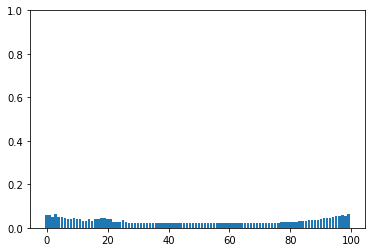

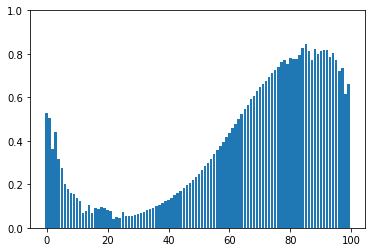

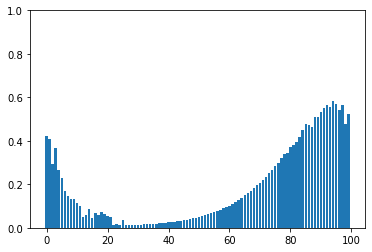

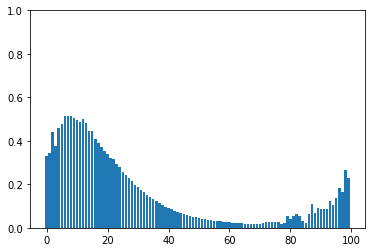

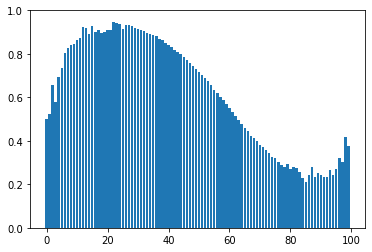

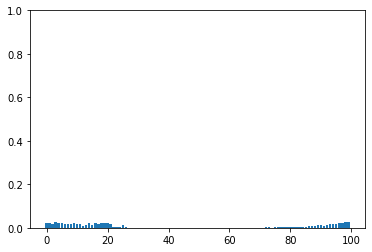

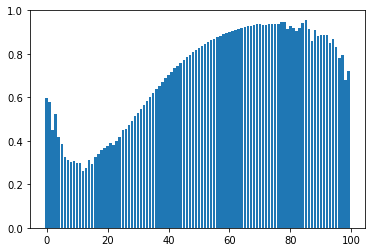

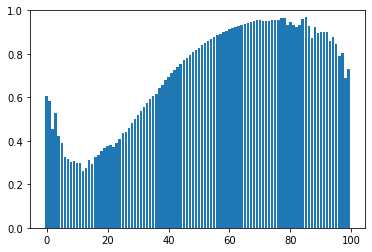

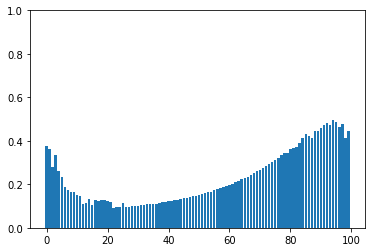

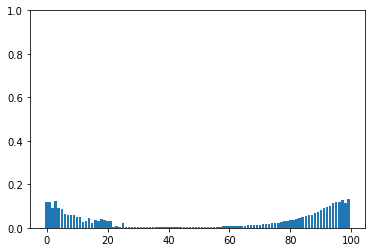

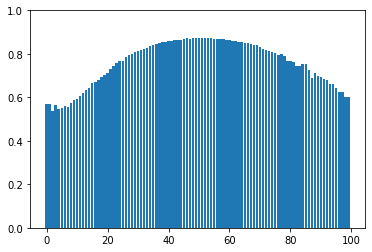

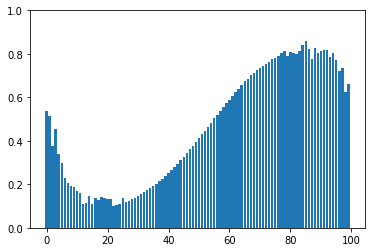

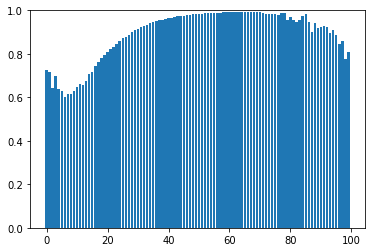

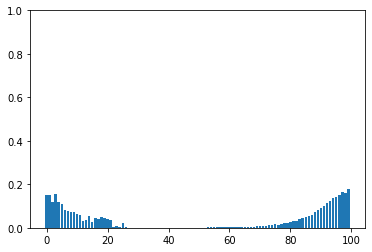

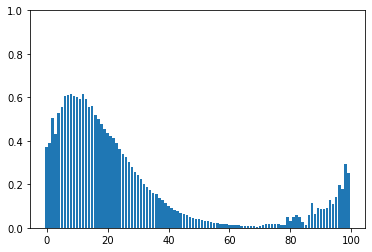

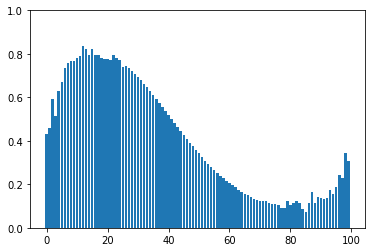

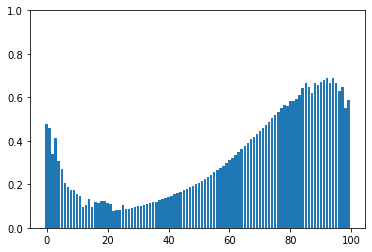

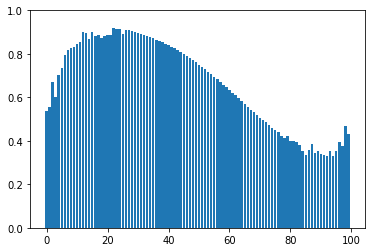

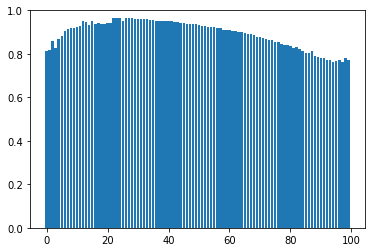

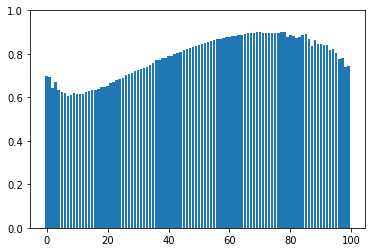

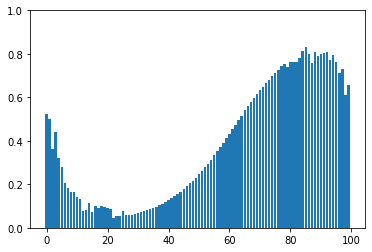

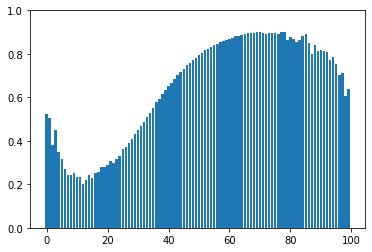

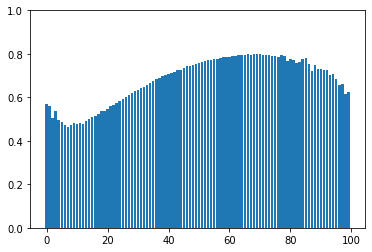

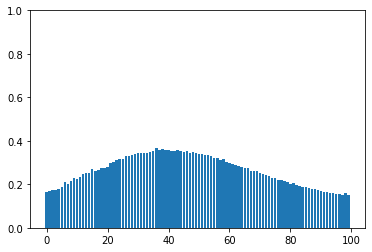

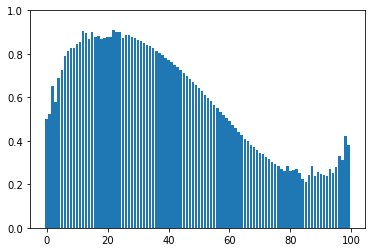

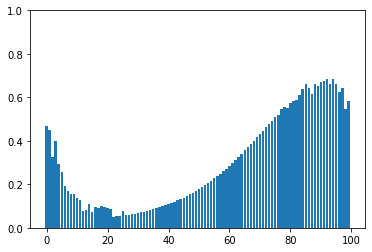

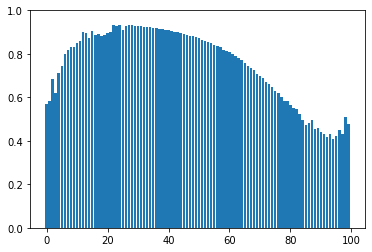

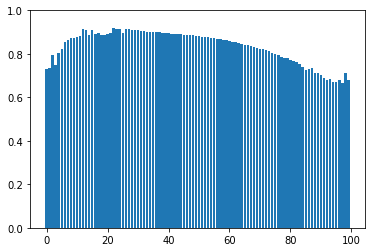

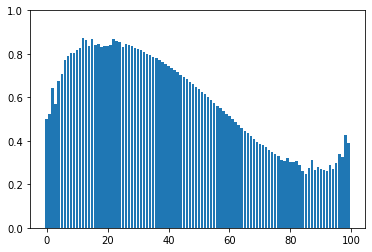

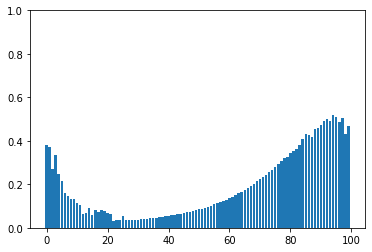

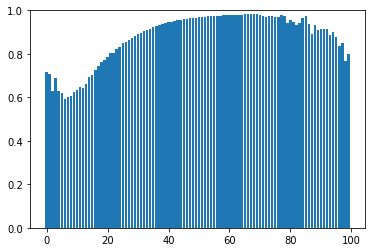

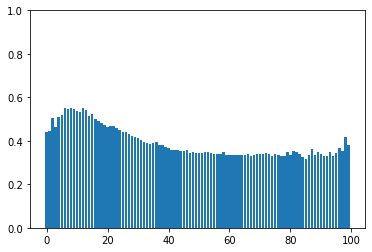

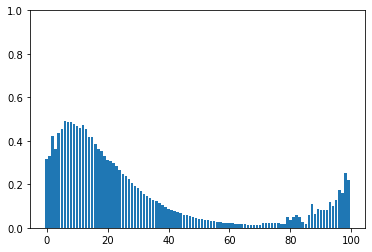

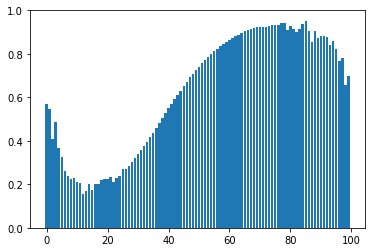

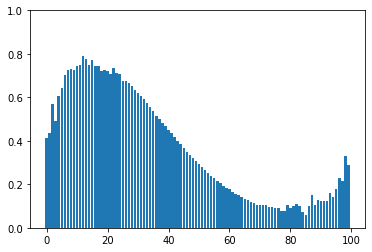

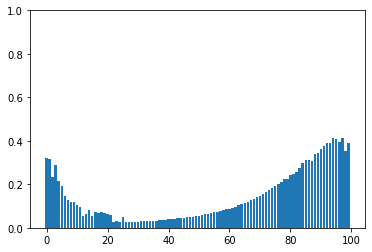

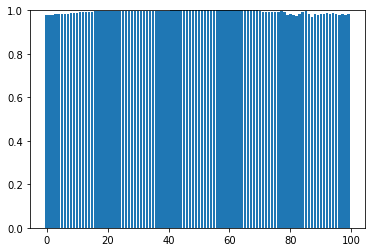

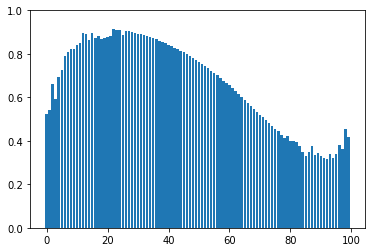

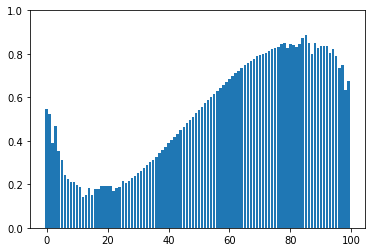

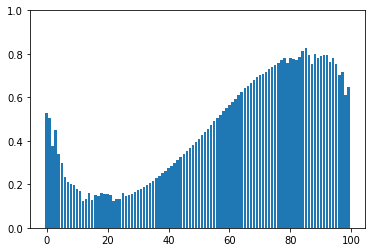

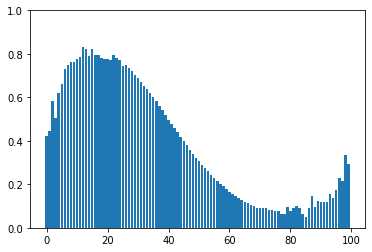

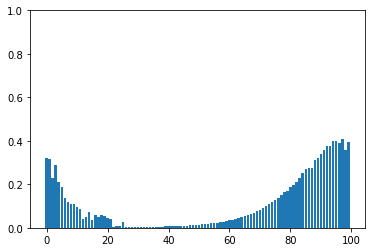

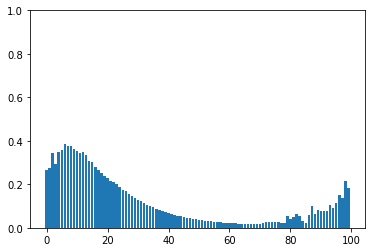

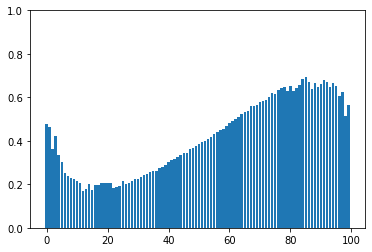

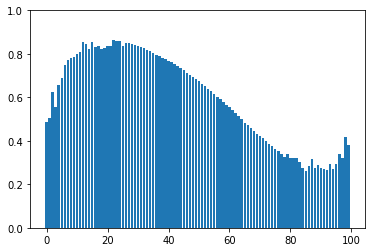

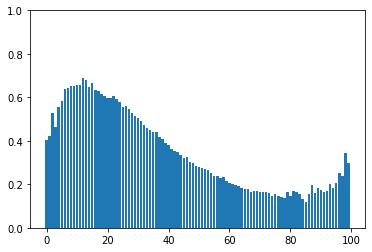

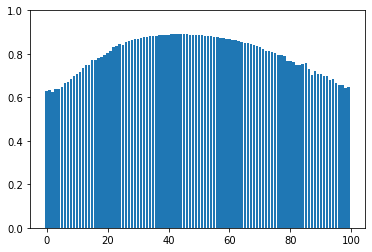

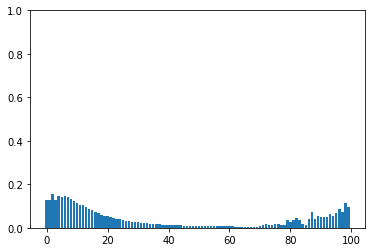

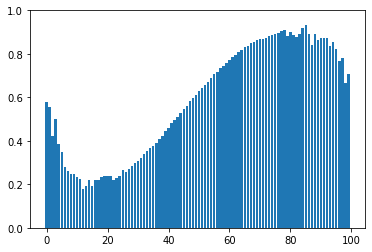

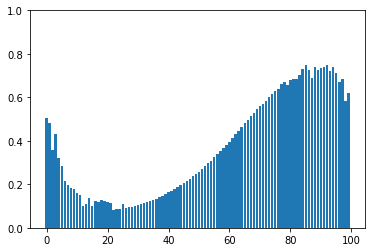

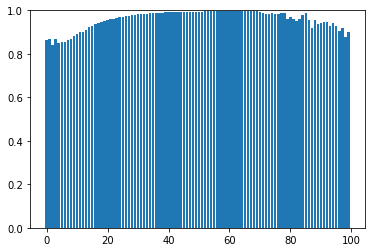

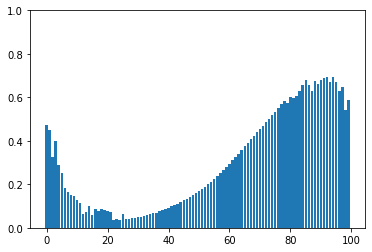

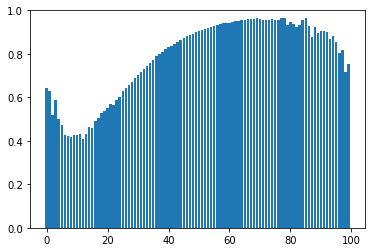

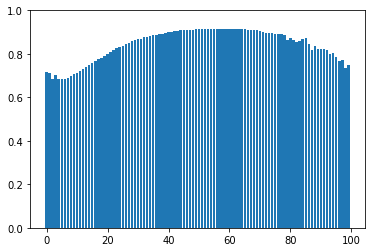

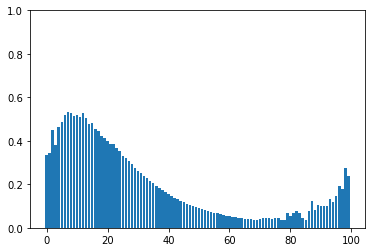

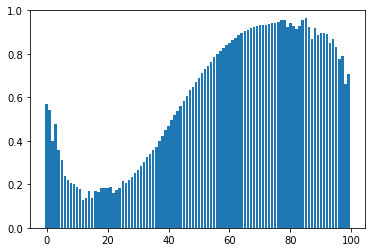

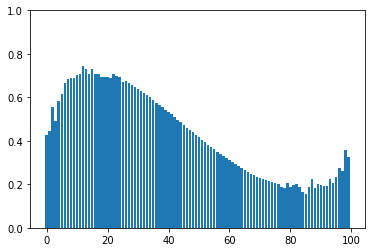

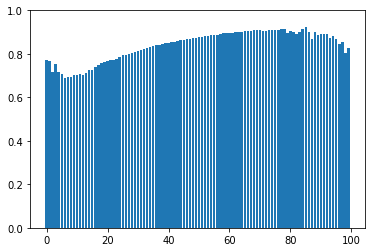

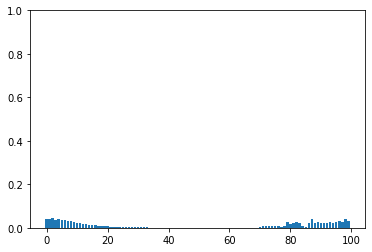

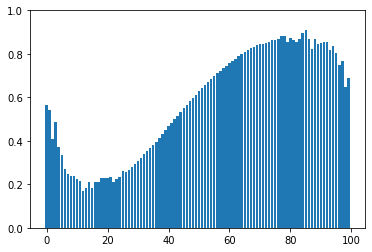

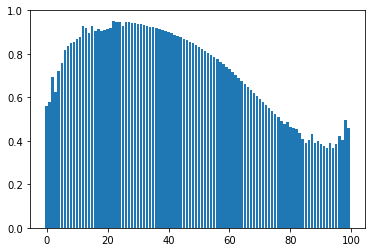

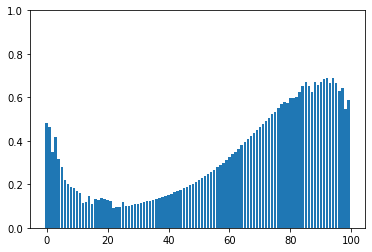

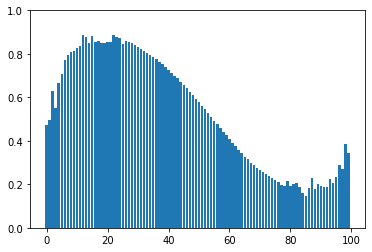

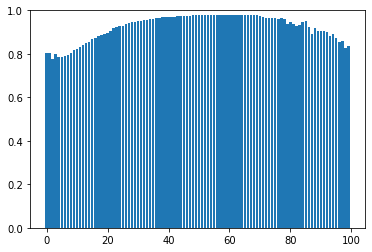

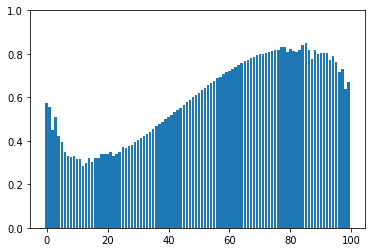

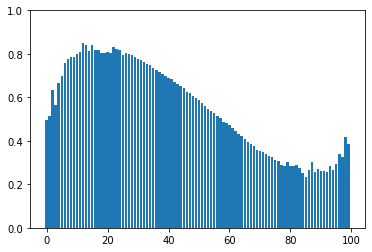

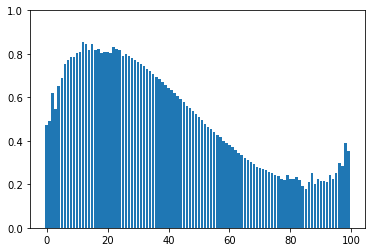

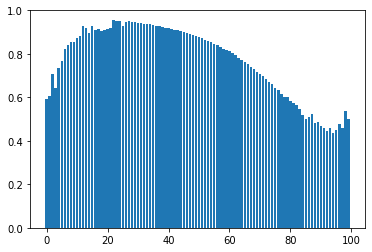

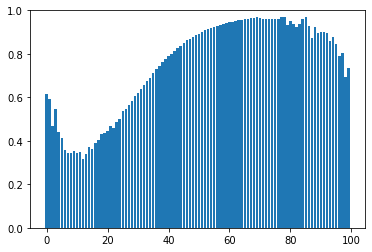

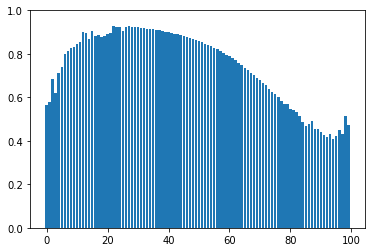

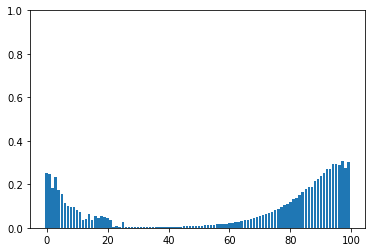

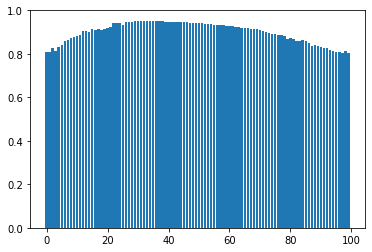

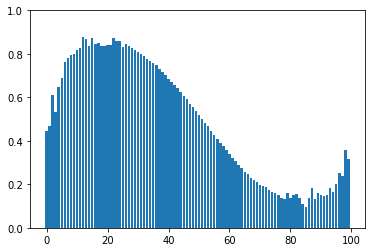

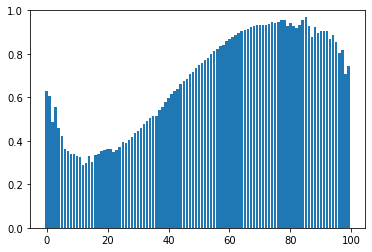

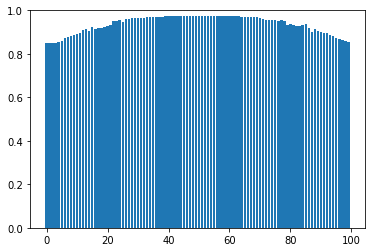

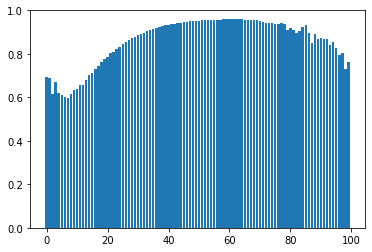

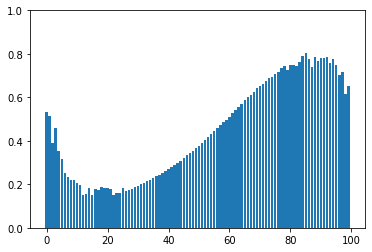

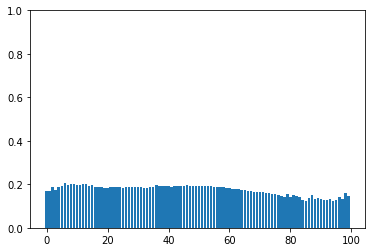

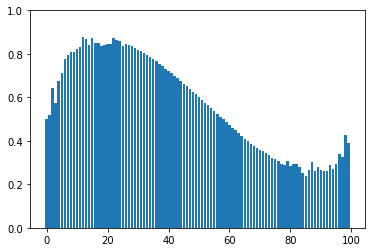

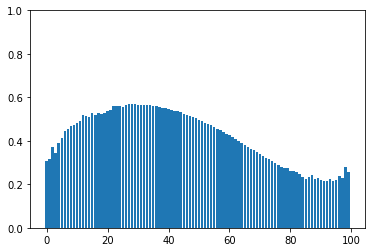

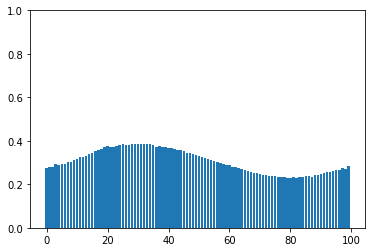

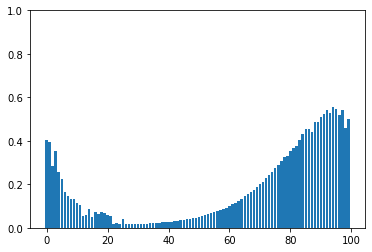

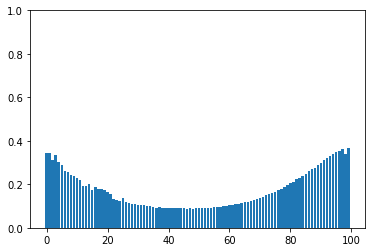

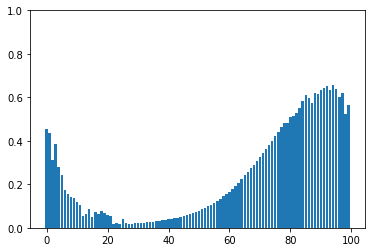

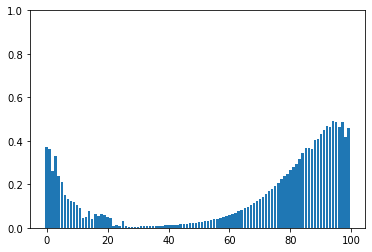

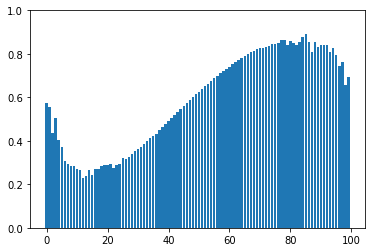

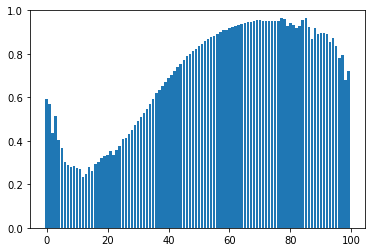

<Figure size 432x288 with 0 Axes>

In [7]:
plot_average_activations(net, generator)